# Matrix decomposition
---
---

Matrix `decomposition` is a method that reduces a matrix into its constituent parts, making it easier to do more complex matrix operations. `Matrix decomposition methods, also called matrix factorization methods`, are the foundation of linear algebra in computers, as well as basic operations such as solving systems of linear equations, calculating the inverse, and calculating the determinant of a matrix.

### Singular value decomposition (SVD)
---

Perhaps the best known and most frequently used matrix decomposition method is singular value decomposition. `All matrices have an SVD, which makes it more universal than other methods,` e.g. the eigendecomposition. As such, it is often used in a wide array of applications including compression, denoising, and data reduction.

#### Decomposition of Images using SVD

In [1]:
# 1. Identify the image to be decomposed


In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

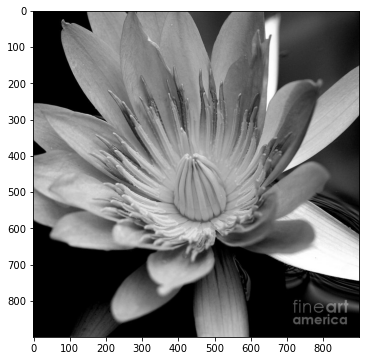

In [4]:
# Load the image into python
img = Image.open('./flower_square.jpg')
imggray = img.convert('LA') 
plt.figure(figsize=(9, 6))
plt.imshow(imggray)


### # Step 4: Convert image into matrix.
Now, we will `convert the image data into a NumPy matrix and plot the result to show the picture is unchanged.` We added a couple of print statements to track the shape of the objects during the transformation.

<class 'numpy.ndarray'>
(810000,)
(900, 900)
<class 'numpy.matrix'>
(900, 900)


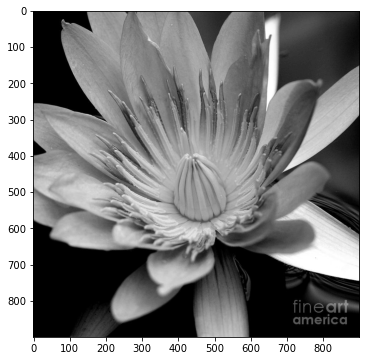

In [6]:
# Step 4: Convert image into matrix.
imgmat = np.array(list(imggray.getdata(band=0)), float)
print(type(imgmat))
print(imgmat.shape)
imgmat.shape = (imggray.size[1], imggray.size[0])
print(imgmat.shape)

imgmat = np.matrix(imgmat)
print(type(imgmat))
print(imgmat.shape)

plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')

In [7]:
# Step 5: Perform SVD on the matrix
U, sigma, V = np.linalg.svd(imgmat)


Now, we compute an approximation of the image using `ONLY the first column of U and the first row of V.` This approximation reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom.

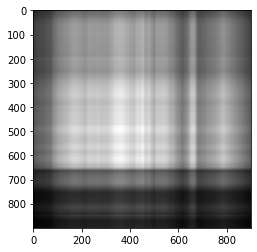

In [8]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray')

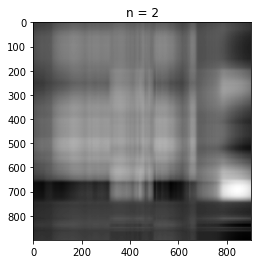

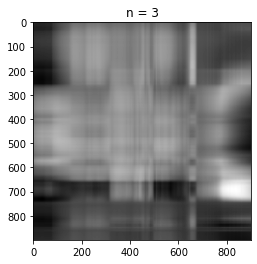

In [9]:
# Even with just the second and third vectors, the shape of the arch begins to appear.
# we have replaced 1 from previous code with i
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

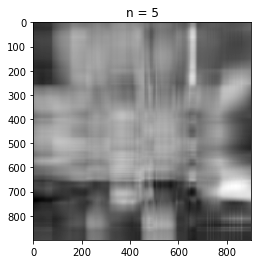

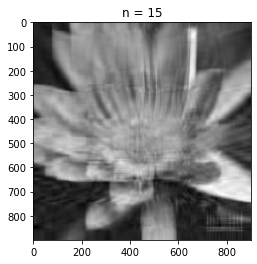

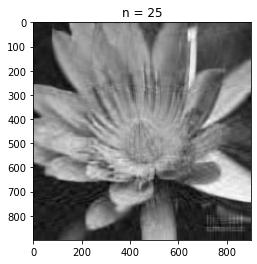

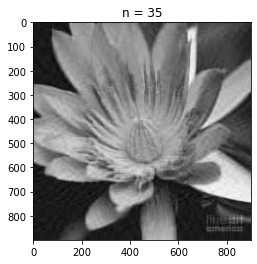

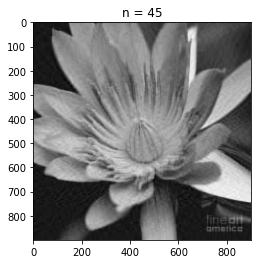

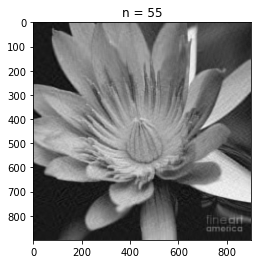

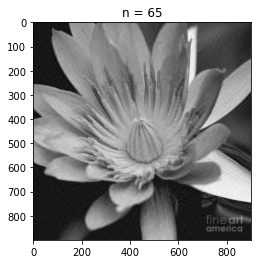

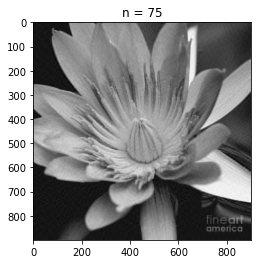

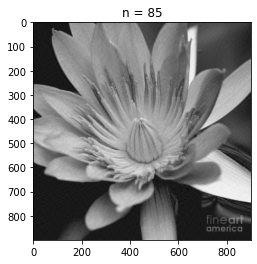

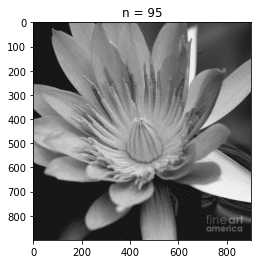

In [11]:
# We can check the same reconstruction for more vectors:
for i in range(5, 100, 10): #$ step size of 10
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()